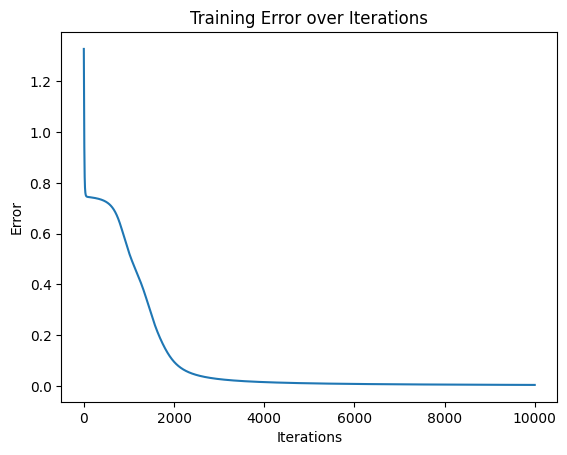

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function: Sigmoid with clipping to prevent overflow
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class with 2 hidden layers
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden1 = 2 * np.random.rand(input_size, hidden1_size) - 1
        self.bias_hidden1 = 2 * np.random.rand(hidden1_size) - 1
        self.weights_hidden1_hidden2 = 2 * np.random.rand(hidden1_size, hidden2_size) - 1
        self.bias_hidden2 = 2 * np.random.rand(hidden2_size) - 1
        self.weights_hidden2_output = 2 * np.random.rand(hidden2_size, output_size) - 1
        self.bias_output = 2 * np.random.rand(output_size) - 1

    def forward(self, inputs):
        # Forward propagation
        self.hidden1_input = np.dot(inputs, self.weights_input_hidden1) + self.bias_hidden1
        self.hidden1_output = sigmoid(self.hidden1_input)
        self.hidden2_input = np.dot(self.hidden1_output, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.hidden2_output = sigmoid(self.hidden2_input)
        self.output_layer_input = np.dot(self.hidden2_output, self.weights_hidden2_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, inputs, expected_output, learning_rate):
        # Calculate error
        output_error = expected_output - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden2_error = output_delta.dot(self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * sigmoid_derivative(self.hidden2_output)

        hidden1_error = hidden2_delta.dot(self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * sigmoid_derivative(self.hidden1_output)

        # Update weights and biases
        self.weights_hidden2_output += self.hidden2_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_hidden1_hidden2 += self.hidden1_output.T.dot(hidden2_delta) * learning_rate
        self.bias_hidden2 += np.sum(hidden2_delta, axis=0) * learning_rate
        self.weights_input_hidden1 += inputs.T.dot(hidden1_delta) * learning_rate
        self.bias_hidden1 += np.sum(hidden1_delta, axis=0) * learning_rate

        # Return the error for plotting
        return np.sum(output_error**2) / len(inputs)

    def train(self, inputs, expected_output, iterations, learning_rate):
        errors = []
        for i in range(iterations):
            self.forward(inputs)
            error = self.backward(inputs, expected_output, learning_rate)
            errors.append(error)
            # if i % 100 == 0:
            #     print(f"Iteration {i}: Error = {error}")
        return errors

# Example usage
if __name__ == "__main__":
    # Input data (4 inputs)
    inputs = np.array([[0, 0,0],
                       [0, 1,0],
                       [1, 0,0],
                       [1, 1,1]])

    # Expected output (2 outputs)
    expected_output = np.array([[0, 0, 0, 1],
                            [0, 0, 1, 0],
                            [0, 1, 0, 0],
                            [1, 0, 0, 0]])

    # Create neural network
    nn = NeuralNetwork(input_size=3, hidden1_size=4, hidden2_size=4, output_size=4)

    # Train the neural network and get the error values
    errors = nn.train(inputs, expected_output, iterations=10000, learning_rate=0.1)

    # Plot the error values
    plt.plot(errors)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Training Error over Iterations')
    plt.show()

    # Test the neural network
    # print("Predicted Output:")
    # print(nn.forward(inputs))

In [5]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Activation function: Sigmoid with clipping to prevent overflow
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class with 2 hidden layers
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden1 = 2 * np.random.rand(input_size, hidden1_size) - 1
        self.bias_hidden1 = 2 * np.random.rand(hidden1_size) - 1
        self.weights_hidden1_hidden2 = 2 * np.random.rand(hidden1_size, hidden2_size) - 1
        self.bias_hidden2 = 2 * np.random.rand(hidden2_size) - 1
        self.weights_hidden2_output = 2 * np.random.rand(hidden2_size, output_size) - 1
        self.bias_output = 2 * np.random.rand(output_size) - 1

    def forward(self, inputs):
        # Forward propagation
        self.hidden1_input = np.dot(inputs, self.weights_input_hidden1) + self.bias_hidden1
        self.hidden1_output = sigmoid(self.hidden1_input)
        self.hidden2_input = np.dot(self.hidden1_output, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.hidden2_output = sigmoid(self.hidden2_input)
        self.output_layer_input = np.dot(self.hidden2_output, self.weights_hidden2_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, inputs, expected_output, learning_rate):
        # Calculate error
        output_error = expected_output - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden2_error = output_delta.dot(self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * sigmoid_derivative(self.hidden2_output)

        hidden1_error = hidden2_delta.dot(self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * sigmoid_derivative(self.hidden1_output)

        # Update weights and biases
        self.weights_hidden2_output += self.hidden2_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_hidden1_hidden2 += self.hidden1_output.T.dot(hidden2_delta) * learning_rate
        self.bias_hidden2 += np.sum(hidden2_delta, axis=0) * learning_rate
        self.weights_input_hidden1 += inputs.T.dot(hidden1_delta) * learning_rate
        self.bias_hidden1 += np.sum(hidden1_delta, axis=0) * learning_rate

        # Return the error for plotting
        return np.sum(output_error**2) / len(inputs)

    def train(self, inputs, expected_output, iterations, learning_rate):
        errors = []
        for i in range(iterations):
            self.forward(inputs)
            error = self.backward(inputs, expected_output, learning_rate)
            errors.append(error)
            if i % 100 == 0:
                print(f"Iteration {i}: Error = {error}")
        return errors

# Load and preprocess the MNIST dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # Normalize the pixel values to be between 0 and 1
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    # Flatten the images to be 1D vectors of size 784 (28x28)
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    # Convert labels to one-hot encoding
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]
    return x_train, y_train, x_test, y_test

# Example usage
if __name__ == "__main__":
    # Load and preprocess the MNIST dataset
    x_train, y_train, x_test, y_test = load_data()

    # Create neural network
    nn = NeuralNetwork(input_size=28*28, hidden1_size=128, hidden2_size=64, output_size=10)

    # Train the neural network and get the error values
    errors = nn.train(x_train, y_train, iterations=10000, learning_rate=0.1)

    # Plot the error values
    plt.plot(errors)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Training Error over Iterations')
    plt.show()

    # Test the neural network
    print("Predicted Output for first 10 test samples:")
    print(nn.forward(x_test[:10]))
    print("Actual Output for first 10 test samples:")
    print(y_test[:10])

ModuleNotFoundError: No module named 'tensorflow'